In [2]:
import sklearn 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report



# Datos de ejemplo: correos electrónicos etiquetados como spam o no spam

emails = [
    ("Oferta especial solo hoy", 1),  # Ejemplo de spam
    ("Confirmación de pedido", 0),    # Ejemplo de no spam
    ("Gana un premio increíble", 1),  # Ejemplo de spam
    ("Actualización de cuenta", 0),    # Ejemplo de no spam
    ("¡Gana un iPhone X GRATIS ahora!", 1),  # Ejemplo de spam
    ("Descarga nuestro software milagroso para perder peso rápido", 1),  # Ejemplo de spam
    ("Oferta de préstamo sin verificación de crédito", 1),  # Ejemplo de spam
    ("Increíble inversión: ¡Dobla tu dinero en una semana!", 1),  # Ejemplo de spam
    ("¡Felicidades! Eres el ganador de un premio de un millón de dólares", 1),  # Ejemplo de spam
    ("Aumenta tu rendimiento en la cama con nuestra píldora mágica", 1),  # Ejemplo de spam
    ("Descubre cómo hacer dinero desde casa sin esfuerzo!", 1),  # Ejemplo de spam
    ("Haz clic aquí para reclamar tu tarjeta de regalo de $100", 1),  # Ejemplo de spam
    ("Gane dinero rápido con nuestro sistema de marketing multinivel", 1),  # Ejemplo de spam
    ("Tu factura ha sido aprobada: Paga ahora para evitar problemas", 1),  # Ejemplo de spam
    ("Notificación de envío de paquete", 0),  # Ejemplo de no spam
    ("Recordatorio de reunión de trabajo", 0),  # Ejemplo de no spam
    ("Oferta especial para clientes leales", 0),  # Ejemplo de no spam
    ("Actualización de política de privacidad", 0),  # Ejemplo de no spam
    ("Invitación a la fiesta de empresa", 0),  # Ejemplo de no spam
]
# La mayoria de los algoritmos de machine learning no trabajan con cosas que 
# no sean valores numericos 

# Separar los datos en características (X) y etiquetas (y)
X = [email[0] for email in emails]
y = [email[1] for email in emails]

print(X)
# Tenemos 12 ejemplos de SPAM y 7 de no SPAM
print((y))

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
# random_state significa que siempre vamos a seleccionar los mismos valores
# en las mismas posiciones. Es un conjunto arbitrario de random.  


print(f"Tamanio entrenamiento: {len(y_train)}")
print(f"Prueba: {len(y_test)}")
print(f"Elementos de prueba, {y_test}")


['Oferta especial solo hoy', 'Confirmación de pedido', 'Gana un premio increíble', 'Actualización de cuenta', '¡Gana un iPhone X GRATIS ahora!', 'Descarga nuestro software milagroso para perder peso rápido', 'Oferta de préstamo sin verificación de crédito', 'Increíble inversión: ¡Dobla tu dinero en una semana!', '¡Felicidades! Eres el ganador de un premio de un millón de dólares', 'Aumenta tu rendimiento en la cama con nuestra píldora mágica', 'Descubre cómo hacer dinero desde casa sin esfuerzo!', 'Haz clic aquí para reclamar tu tarjeta de regalo de $100', 'Gane dinero rápido con nuestro sistema de marketing multinivel', 'Tu factura ha sido aprobada: Paga ahora para evitar problemas', 'Notificación de envío de paquete', 'Recordatorio de reunión de trabajo', 'Oferta especial para clientes leales', 'Actualización de política de privacidad', 'Invitación a la fiesta de empresa']
[1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
Tamanio entrenamiento: 15
Prueba: 4
Elementos de prueb

It is ideal to always train on balanced data. You might do it with unbalanced data but the performance metrics work differently. 

For example, if you have a data set of 90-10, if you get 90% correct or 10% correct that means your algorithm is only able to detect one category, which is incorrect, regardless of how large the score might appear. 

What we look is that all categories must be represented in their particular proportion. 

We will do vectorization for the preprocessing

In [6]:
vectorizer = CountVectorizer()
# To put all the words in an array that maps each word to a specific 
# value. Generally these algorithms just check the words that appear in
# a specific text, however newer algorithms use dictionaries to define
# words. 

X_train_vec = vectorizer.fit_transform(X_train)
# All the fit_transform functons 
X_test_vec = vectorizer.transform(X_test)

print(X)
print(X_test_vec[0])

['Oferta especial solo hoy', 'Confirmación de pedido', 'Gana un premio increíble', 'Actualización de cuenta', '¡Gana un iPhone X GRATIS ahora!', 'Descarga nuestro software milagroso para perder peso rápido', 'Oferta de préstamo sin verificación de crédito', 'Increíble inversión: ¡Dobla tu dinero en una semana!', '¡Felicidades! Eres el ganador de un premio de un millón de dólares', 'Aumenta tu rendimiento en la cama con nuestra píldora mágica', 'Descubre cómo hacer dinero desde casa sin esfuerzo!', 'Haz clic aquí para reclamar tu tarjeta de regalo de $100', 'Gane dinero rápido con nuestro sistema de marketing multinivel', 'Tu factura ha sido aprobada: Paga ahora para evitar problemas', 'Notificación de envío de paquete', 'Recordatorio de reunión de trabajo', 'Oferta especial para clientes leales', 'Actualización de política de privacidad', 'Invitación a la fiesta de empresa']
<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 2 stored elements and shape (1, 72)>
  Coords	Values


## CountVectorizer: `fit_transform` vs `transform`

`CountVectorizer` converts raw text into numerical feature matrices that machine learning algorithms can process. It works in two distinct phases:

---

### `fit` — Learn the vocabulary
- Scans every document in the **training set** and collects all unique words (tokens).
- Assigns each unique word a fixed integer index, building a **vocabulary dictionary**.
- Example vocabulary learned from training emails:
  ```
  {"oferta": 0, "especial": 1, "gana": 2, "premio": 3, "cuenta": 4, ...}
  ```

### `transform` — Encode documents as word-count vectors
- Takes documents and converts each one into a **sparse matrix row**.
- Each column corresponds to one word in the vocabulary; the cell value is the **word count** for that document.
- Example: `"Gana un premio"` → `[0, 0, 1, 1, 0, ...]` (only "gana" and "premio" columns are non-zero).

---

### Why use them separately?

| Call | Used on | What it does |
|---|---|---|
| `fit_transform(X_train)` | Training data | Learns vocabulary **and** encodes in one step |
| `transform(X_test)` | Test data | Encodes using the **already-learned** vocabulary — never re-fits |

**Key rule:** You must never call `fit` (or `fit_transform`) on test data. Doing so would:
1. Create a different vocabulary, making column indices incompatible with the trained model.
2. Leak information from the test set into the feature space (data leakage), producing overly optimistic metrics.

Any word in the test set that was **not** seen during training is simply ignored (its count stays 0).


In [8]:
classifier = MultinomialNB()
classifier.fit(X_train_vec, y_train)

y_pred = classifier.predict(X_test_vec)
print(f"predichas: {y_pred} ; Reales {y_test}")

predichas: [0 0 0 1] ; Reales [0, 0, 1, 1]


`CountVectorizer` automatically removes extremely common words, such as "the".

```python
vectorizer = CountVectorizer(stop_words='english')
```

With TfidVectorizer we can automatically give more attention to unique words and less to those that appear way too frequently.  

```python
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
```

You can also put the frequency explicitly 

```python
# ignore words that appear in more than 80% of documents (too common)
# ignore words that appear in fewer than 2 documents (too rare)
vectorizer = CountVectorizer(max_df=0.8, min_df=2)
```

In practice, TF-IDF is the most common choice



In [9]:
# calculate the precision and show the 
# report of the classification

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=["No SPAM", "SPAM"])
print(f"Accuracy: {accuracy}")
print(f"Informe de clasificacion: \n {report}")

Accuracy: 0.75
Informe de clasificacion: 
               precision    recall  f1-score   support

     No SPAM       0.67      1.00      0.80         2
        SPAM       1.00      0.50      0.67         2

    accuracy                           0.75         4
   macro avg       0.83      0.75      0.73         4
weighted avg       0.83      0.75      0.73         4




## F1-Score

The `classification_report` outputs per-class metrics. The most important one is the **F1-score**, which combines two complementary measures:

| Metric | Question it answers | Formula |
|---|---|---|
| **Precision** | Of everything predicted as class X, how many truly are X? | $\frac{TP}{TP + FP}$ |
| **Recall** | Of everything that truly is class X, how many did we catch? | $\frac{TP}{TP + FN}$ |
| **F1-score** | Harmonic mean of Precision and Recall | $2 \cdot \frac{P \times R}{P + R}$ |

Where **TP** = True Positives, **FP** = False Positives, **FN** = False Negatives.

### Why harmonic mean, not arithmetic mean?
The harmonic mean punishes extreme imbalance between the two values. A model with Precision=1.0 and Recall=0.0 would score:
- Arithmetic mean: **0.5** (misleadingly decent)
- Harmonic mean (F1): **0.0** (correctly terrible)

### Why prefer F1 over Accuracy on imbalanced data?
With 12 spam and 6 non-spam emails, a model that **always predicts spam** achieves 67% accuracy — but F1 for the non-spam class would be 0, immediately exposing the problem.

### The report also shows:
- **macro avg** — unweighted average across classes (treats all classes equally)
- **weighted avg** — average weighted by class support (number of samples per class)


There are times in which the algorithm is correct but there is too few training data. By adding more we can get far better performance. 

Most of modern architectures are based on more data, more attention heads and a better depuration of data. 

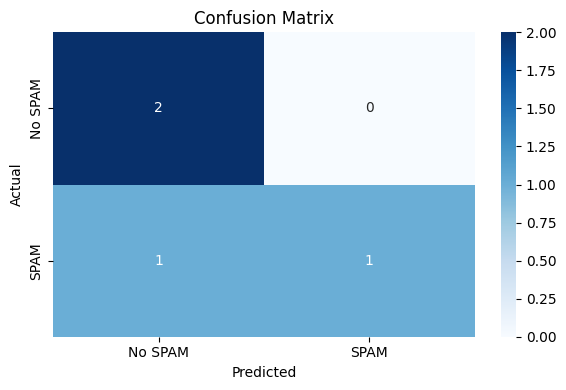

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No SPAM", "SPAM"],
    yticklabels=["No SPAM", "SPAM"]
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()
